__собираем статистики по объявлениям о продаже земли__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Вт 16 июл 2024 13:46:17 MSK


# загружаем данные

In [2]:
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_land.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

37001

title  \
11376  участок, 6 сот., садоводство   
15167         участок 10 сот. (ижс)   
15632        участок 6,5 сот. (ижс)   

                                                                   address  \
11376                               севастополь,р-н гагаринский,орешек тсн   
15167  севастополь,садоводческое товарищество вишенка,пер.анатолия дрыгина   
15632                          севастополь,садовое товарищество тополёк,51   

       latitude  longitude  priceM          dt  
11376     44.57      33.46    2.00  2024-06-14  
15167     44.57      33.59    5.30  2024-06-17  
15632     44.56      33.53    5.00  2024-06-17

---

In [4]:
# df_ = pd.read_pickle('data/2023/data_land.pkl').rename(columns={'adr':'address'})
# df_['dt'] = df_['ts'].dt.date
# display( len(df_) )
# display( df_.sample(3)[cols] )

In [5]:
# df_ = (
#         df_
#         .dropna(subset=['dt','url'])
#         .drop_duplicates(['dt','url'])
#         .drop(columns=['adr_orig','obj_name','avito_page'])
#     )
# display( len(df_) )
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# display( df_.sample(3)[cols] )

In [6]:
# # history_date = df_['dt'].max()
# history_date = pd.to_datetime('2023-01-10').date()
# display(history_date)

In [7]:
# df = pd.concat([df,df_]).reset_index(drop=True)
# display( len(df) )
# del df_

In [8]:
# df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
# df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

---

In [9]:
import numpy as np
df['log_priceM'] = df['priceM'].apply(lambda x: np.log(x+1.))

---

In [10]:
df['month'] = df['ts'].dt.to_period('M')
df['week'] = df['ts'].dt.to_period('W')

---

In [11]:
display( len(df) )
df = df.dropna(subset=['latitude','longitude'])
display( len(df) )

37001

37001

In [12]:
# print(len(df))
# # выкидываем "ущербные" варианты 
# df = df.query('is_IJS')
# print(len(df))

In [13]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

title  \
9283   участок, 6 сот., садоводство   
11765  участок, 4 сот., садоводство   
124            участок, 7 сот., ижс   

                                                                                     address  \
9283                          севастополь,р-н нахимовский,прибрежное садовое товарищество,87   
11765                          севастополь,р-н балаклавский,берег садоводческое товарищество   
124    севастополь,р-н гагаринский,сатурн садовое товарищество,аллея защитников 35-й батареи   

       latitude  longitude  priceM          dt  
9283      44.73      33.55    5.00  2024-06-18  
11765     44.51      33.49    3.00  2024-06-14  
124       44.56      33.41    5.20  2024-06-11

In [14]:
display( len(df) )
gdf = gdf.query('place in ("bahchisaray","sudak","sevastopol")')
display( len(df) )

37001

37001

---

In [15]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
display( dt_min,dt_max )
# display( dt_min,history_date,dt_max )

datetime.date(2024, 6, 7)

datetime.date(2024, 7, 16)

In [16]:
# display( len(gdf_history) )
display( len(gdf) )

36831

In [17]:
gdf['log_priceMU']  =gdf['priceMU'].apply(np.log)

In [18]:
# gdf['priceMU']

# общая статистика

In [19]:
gdf[['title','address','priceM','geometry']].sample(512).explore()

In [20]:
gdf.query('place=="sevastopol"')[['title','address','priceM','geometry']].sample(512).explore()

In [21]:
( 
    gdf.query('place=="sudak"')
    [['title','address','priceM','area_size_category','geometry']]
    #.explore('area_size_category', legend=True) 
    .explore()    
)

In [22]:
(
    gdf.query('place=="bahchisaray"')
    [['title','address','priceM','area_size_category','geometry']]
    #.sample(100)
    .explore() #'area_size_category', legend=True) 
)

In [23]:
# cols = ['title','adr','priceM','house_size_category','place','url','geometry']

In [24]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = gdf.groupby(['place','area_size_category','week'],observed=True)['priceM'].describe(percentiles=percentiles)
# stat = gdf.groupby(['place','area_size_category','month'],observed=True)['priceM'].describe(percentiles=percentiles)
display( stat )

count  mean   std  min  \
place       area_size_category week                                            
bahchisaray <1                 2024-06-03/2024-06-09   2.00  0.90  0.14 0.80   
                               2024-06-10/2024-06-16   7.00  0.89  0.11 0.80   
                               2024-06-17/2024-06-23   3.00  0.93  0.12 0.80   
                               2024-06-24/2024-06-30   2.00  0.90  0.14 0.80   
                               2024-07-08/2024-07-14   2.00  0.50  0.71 0.00   
...                                                     ...   ...   ...  ...   
sudak       20+                2024-06-10/2024-06-16 125.00 10.57  8.12 0.80   
                               2024-06-17/2024-06-23  84.00 10.68  8.01 1.00   
                               2024-06-24/2024-06-30  35.00 10.44  8.09 1.00   
                               2024-07-08/2024-07-14  59.00 22.52 83.27 1.00   
                               2024-07-15/2024-07-21  43.00 28.64 97.09 1.00   

                                                       1%   5%  10%  25%  50%  \
place       area_size_category week                                             
bahchisaray <1                 2024-06-03/2024-06-09 0.80 0.81 0.82 0.85 0.90   
                               2024-06-10/2024-06-16 0.80 0.80 0.80 0.80 0.80   
                               2024-06-17/2024-06-23 0.80 0.82 0.84 0.90 1.00   
                               2024-06-24/2024-06-30 0.80 0.81 0.82 0.85 0.90   
                               2024-07-08/2024-07-14 0.01 0.05 0.10 0.25 0.50   
...                                                   ...  ...  ...  ...  ...   
sudak       20+                2024-06-10/2024-06-16 0.80 1.50 2.85 4.80 7.30   
                               2024-06-17/2024-06-23 1.83 2.38 2.85 4.80 7.50   
                               2024-06-24/2024-06-30 1.34 2.07 2.62 4.40 7.50   
                               2024-07-08/2024-07-14 1.35 1.90 2.50 3.50 6.60   
                               2024-07-15/2024-07-21 1.00 1.63 2.50 3.55 7.30   

                                                       75%   90%   95%    max  
place       area_size_category week                                            
bahchisaray <1                 2024-06-03/2024-06-09  0.95  0.98  0.99   1.00  
                               2024-06-10/2024-06-16  1.00  1.00  1.00   1.00  
                               2024-06-17/2024-06-23  1.00  1.00  1.00   1.00  
                               2024-06-24/2024-06-30  0.95  0.98  0.99   1.00  
                               2024-07-08/2024-07-14  0.75  0.90  0.95   1.00  
...                                                    ...   ...   ...    ...  
sudak       20+                2024-06-10/2024-06-16 15.50 22.00 30.00  30.00  
                               2024-06-17/2024-06-23 15.35 22.00 30.00  30.00  
                               2024-06-24/2024-06-30 15.40 21.60 27.90  30.00  
                               2024-07-08/2024-07-14 11.30 21.20 30.00 610.00  
                               2024-07-15/2024-07-21 15.15 26.00 30.00 610.00  

[124 rows x 13 columns]

In [25]:
stat.reset_index()['area_size_category'].unique()

['<1', '1-2', '2-4', '4-8', '8-12', '12-20', '20+']
Categories (7, object): ['<1' < '1-2' < '2-4' < '4-8' < '8-12' < '12-20' < '20+']

In [26]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
# sizes = [ '2-4', '4-8', '8-20']
sizes = ['4-8', '8-12', '12-20']
display( sizes )

['4-8', '8-12', '12-20']

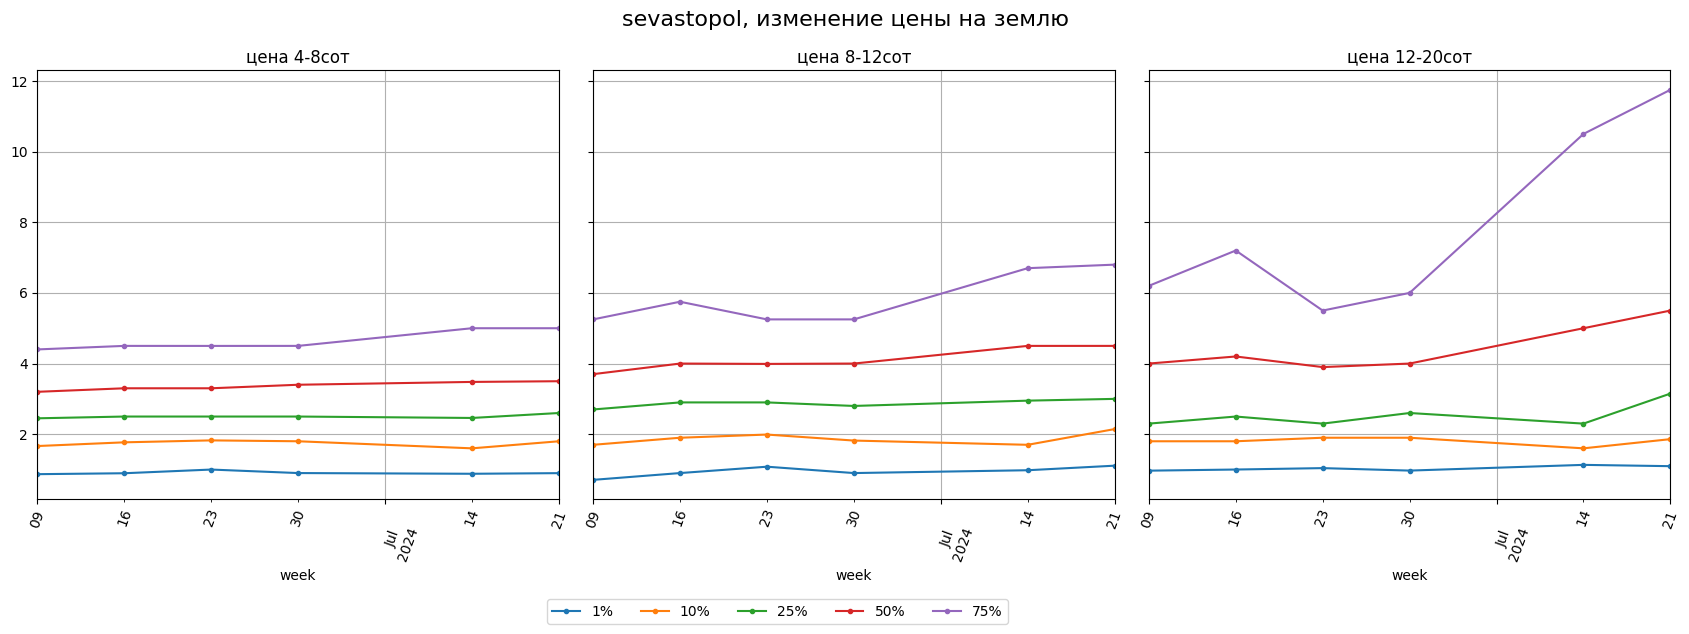

In [27]:
place = 'sevastopol'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

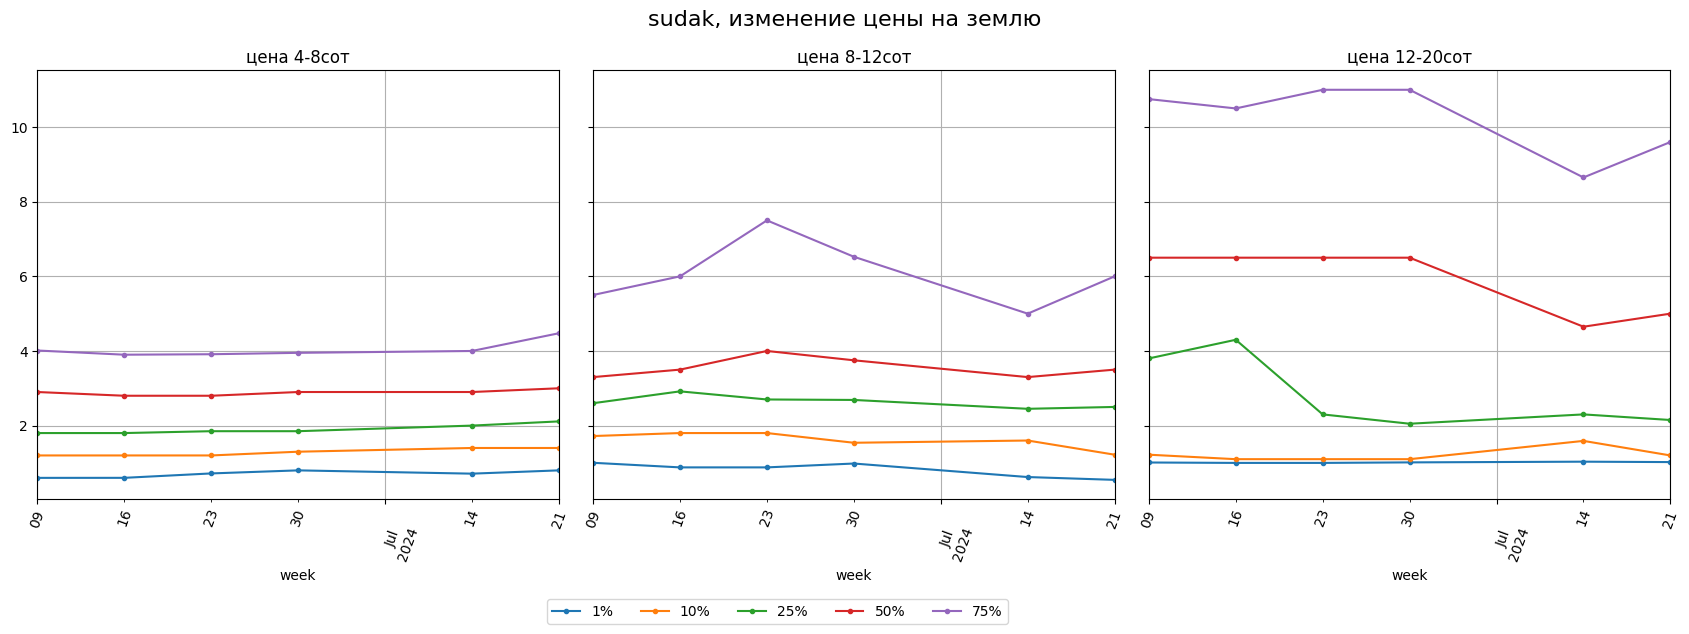

In [28]:
place = 'sudak'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

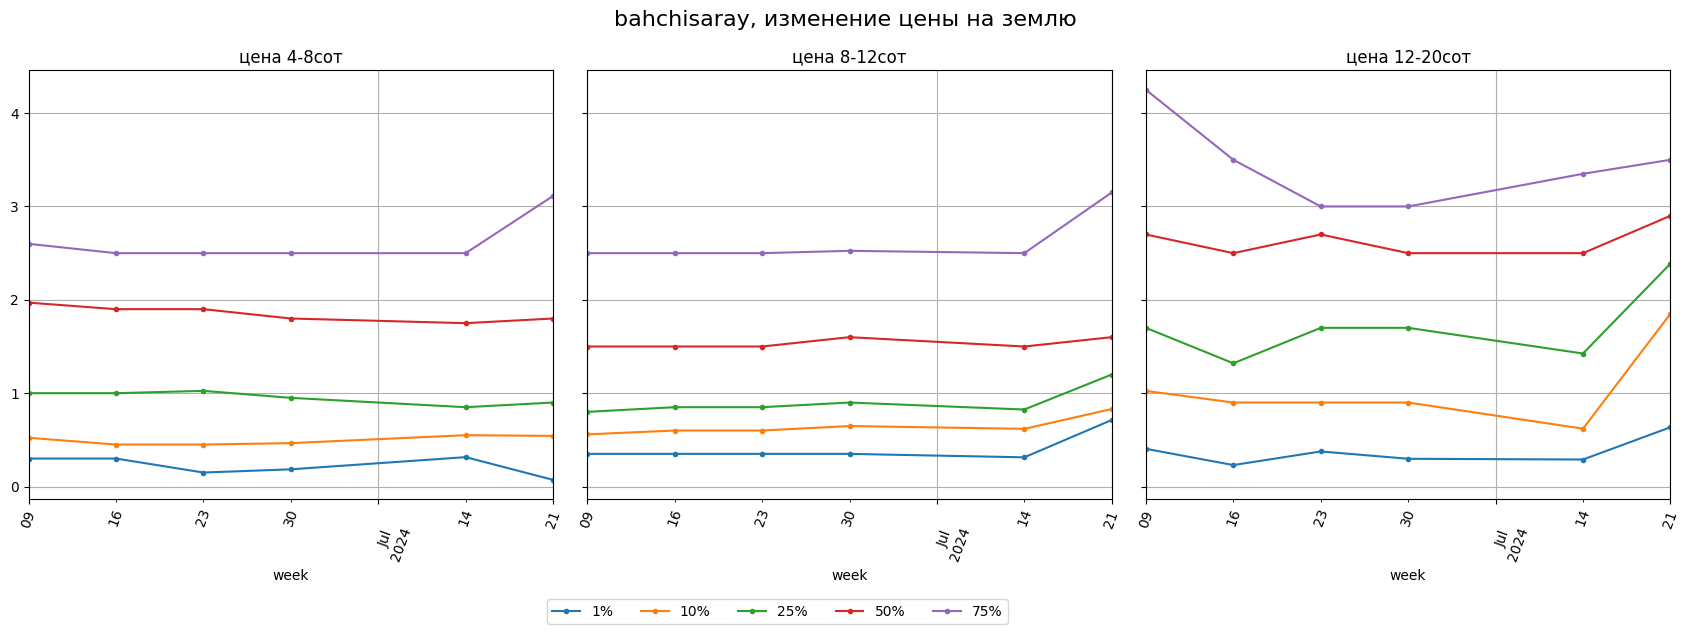

In [29]:
place = 'bahchisaray'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

# актуальная цена

In [30]:
# dt_now = pd.to_datetime('2024-06-17').date()
dt_now = gdf['dt'].max()
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == dt_now ]
display(len(gdf_last))

36831

2386

In [31]:
# display(len(gdf))
# gdf_last = gdf[ gdf['dt'] == gdf['dt'].max() ]
# display(len(gdf_last))

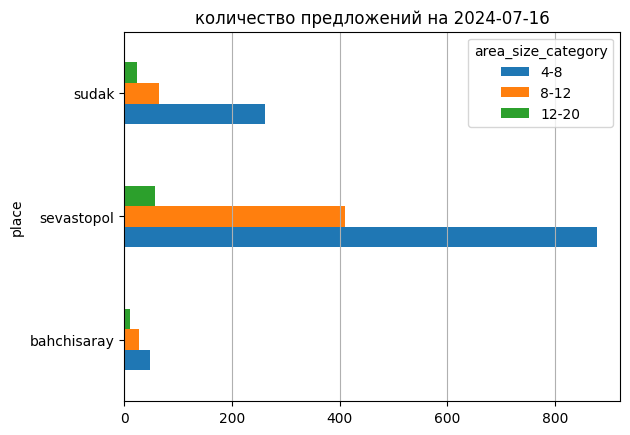

In [32]:
(
gdf_last
.drop_duplicates('url')
.query('area_size_category in @sizes')
.groupby(['area_size_category','place'],observed=True)['url'].count().reset_index()
.pivot(index='place', columns='area_size_category', values='url')
.plot.barh(title='количество предложений на '+ str( dt_now ))
.grid(axis='x')    
)

In [33]:
(
    gdf_last
    .query('area_size_category in @sizes')
    .drop_duplicates('url')
    .groupby(['place','area_size_category'],observed=True)
    ['priceM'].describe(percentiles=percentiles)
)

count  mean   std  min   1%   5%  10%  25%  \
place       area_size_category                                               
bahchisaray 4-8                 48.00  2.55  2.27 0.00 0.07 0.44 0.54 0.90   
            8-12                27.00  3.04  3.87 0.70 0.71 0.77 0.83 1.20   
            12-20               10.00  3.10  1.50 0.50 0.64 1.18 1.85 2.39   
sevastopol  4-8                877.00  4.30  3.70 0.35 0.90 1.35 1.80 2.55   
            8-12               410.00  6.05  7.80 0.75 1.11 1.70 2.15 3.00   
            12-20               58.00  8.72  9.46 0.95 1.09 1.59 1.84 3.21   
sudak       4-8                261.00  3.74  3.10 0.56 0.80 1.20 1.40 2.10   
            8-12                64.00  5.86  7.62 0.36 0.54 1.10 1.22 2.58   
            12-20               23.00  7.58 10.21 1.00 1.02 1.10 1.20 2.15   

                                50%   75%   90%   95%    max  
place       area_size_category                                
bahchisaray 4-8                1.80  3.11  5.50  6.84  11.20  
            8-12               1.60  3.15  4.52 12.35  16.20  
            12-20              2.90  3.50  5.08  5.44   5.80  
sevastopol  4-8                3.50  5.00  7.00  8.72  70.00  
            8-12               4.50  6.80  9.80 14.27 120.00  
            12-20              5.50 12.38 18.60 24.57  58.00  
sudak       4-8                3.00  4.50  6.35  7.50  30.00  
            8-12               3.50  6.00 10.71 19.85  52.50  
            12-20              5.00  9.60 12.90 13.36  50.30

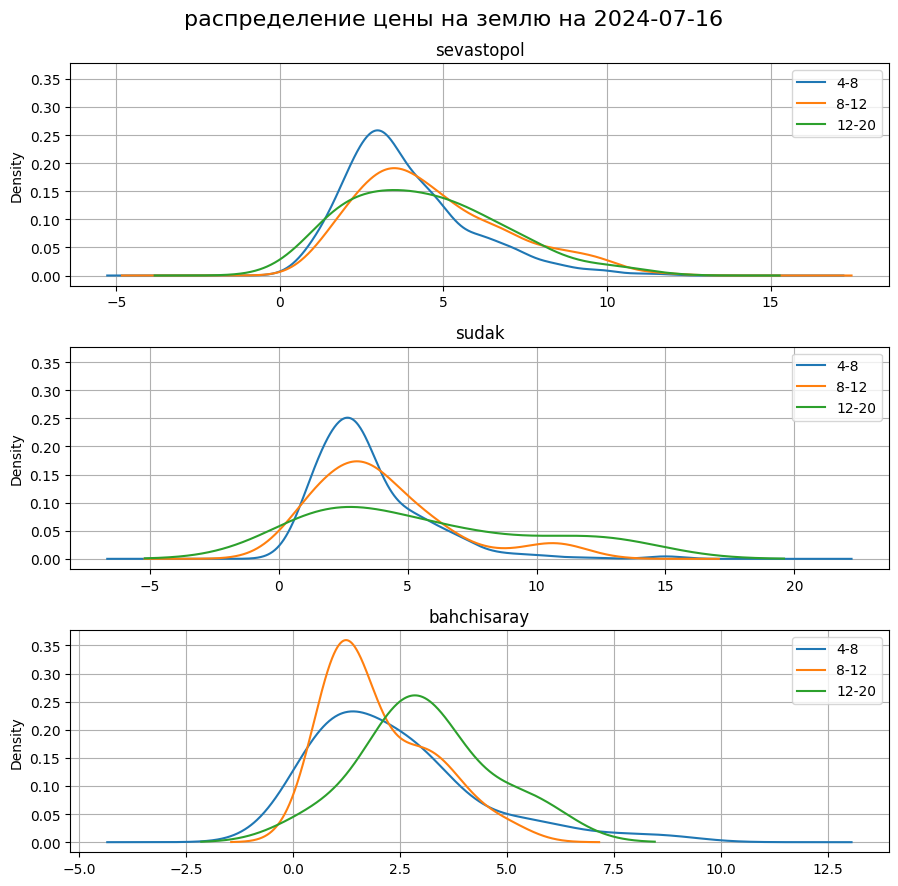

In [34]:
q_95 = gdf_last.groupby(['place'])['priceM'].quantile(.95)

places = ['sevastopol','sudak','bahchisaray']

fig, ax = plt.subplots(len(places),1,figsize=(9,9), sharey=True )
for i,p in enumerate(places): 
    (
        gdf_last
        .query(f'(place=="{p}")&(priceM<{q_95[p]})')
        .query('area_size_category in @sizes')
        .drop_duplicates('url')
        .groupby(['area_size_category'],observed=True)
        ['priceM']
        .plot.kde(legend=True,ax=ax[i],title=f'{p}', grid=True)   
    )
fig.suptitle(f'распределение цены на землю на '+ str( dt_now ), fontsize=16)
fig.tight_layout()

# цены на карте

In [35]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [36]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

## Севастополь

In [37]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

frame_sevastopol.explore()

In [38]:
# gdf_last.query('place=="sevastopol"')[['priceM']].describe([.9,.95,.99]).T

In [39]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=7 )

In [40]:
# медиана цены за сотку

grid_values = ( 
    grid
    # .sjoin( gdf_last.query('(place=="sevastopol")&(priceM<10.0)'), how='inner',)
    .sjoin( 
        gdf_last
        .query('place=="sevastopol"')
        .query('area_size_category in @sizes')
        .drop_duplicates('url')
        ,  how='inner',)
    .groupby(['hex_id'])
    # [['log_priceM','priceMU']]
    [['log_priceMU','priceMU']]
    .median()
    .reset_index()
)

(
    grid
    .merge(grid_values,on='hex_id')
    # [['priceM','geometry','log_priceM',]]
    # .explore(column='log_priceM',cmap='rainbow')
    
    [['priceMU','log_priceMU','geometry']]
    .explore(column='log_priceMU',cmap='rainbow')
)

## Судак

In [41]:
frame_sudak = gpd.GeoDataFrame([{ # все предложения
            'place':'sudak', 
            'geometry':MultiPoint( gdf_last.query('place=="sudak"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

In [42]:
# gdf_last.query('place=="sudak"')[['priceM']].describe([.9,.95,.99]).T

In [43]:
grid = cover_grid_hexagonal( frame_sudak.geometry.values[0],cell_size=8 )

In [44]:
grid_values = ( 
    grid
    .sjoin( 
        gdf_last
        .query('place=="sudak"')
        .query('area_size_category in @sizes')
        .drop_duplicates('url')
        , how='inner',)
    .groupby(['hex_id'])
   [['log_priceMU','priceMU']]
    .median()
    .reset_index()
)

(
    grid
    .merge(grid_values,on='hex_id')
    [['priceMU','log_priceMU','geometry',]]
    .explore(column='log_priceMU',cmap='rainbow')
)

# районы Севастополя

In [45]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

In [46]:
display(frames)

area_name  \
0     Севастополь, район Острякова   
1  Севастополь, парк 60-летия СССР   
2  Севастополь, Хрусталёва/Хрюкина   
3  Севастополь, Геловани/Коломийца   
4     Севастополь, Музыки/Бирюзова   
5   Севастополь, кр.горка (старый)   
6    Севастополь, кр.горка (новый)   
7      Севастополь, Малахов курган   
8       Севастополь, Благополучный   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        geometry  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                          POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   POLYGON ((33.51805 44.58404, 33.51458 44.58408, 33.51263 44.58031, 33.51435 44.57460, 33.52004 44.57520, 33.51805 44.58404))  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POLYGON ((33.52003 44.57511, 33.52527 44.56364, 33.52116 44.56136, 33.51942 44.56406, 33.51951 44.56384, 33.51874 44.56882, 33.51426 44.57444, 33.52003 44.57511))  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POLYGON ((33.52139 44.57296, 33.53034 44.57518, 33.53318 44.57413, 33.53369 44.57139, 33.53244 44.56878, 33.53123 44.56774, 33.52440 44.56640, 33.52139 44.57296))  
4                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [47]:
frames.explore('area_name', legend=True)

In [48]:
area_name=[
    #'Севастополь, парк 60-летия СССР',
    #'Севастополь, Хрусталёва/Хрюкина',
    #'Севастополь, район Острякова',
    #'Севастополь, Малахов курган',
    'Севастополь, кр.горка (старый)',
    'Севастополь, кр.горка (новый)',
    'Севастополь, Благополучный',
    ]

In [49]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

# фильтруем данные по области
gdf_last_local = gdf_last.sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceM','address','geometry']].explore( legend=False)

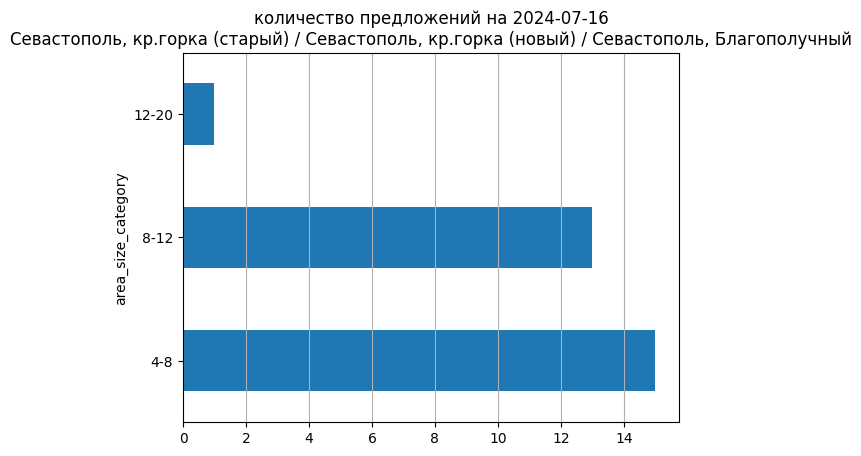

In [50]:
(
    gdf_last_local
    .query('area_size_category in @sizes')
    .drop_duplicates('url')
    .groupby(['area_size_category'], observed=True)['url'].count()
    .plot.barh(title='количество предложений на '+ str( dt_now ) + '\n' + ' / '.join(area_name) )
    .grid(axis='x')    
)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

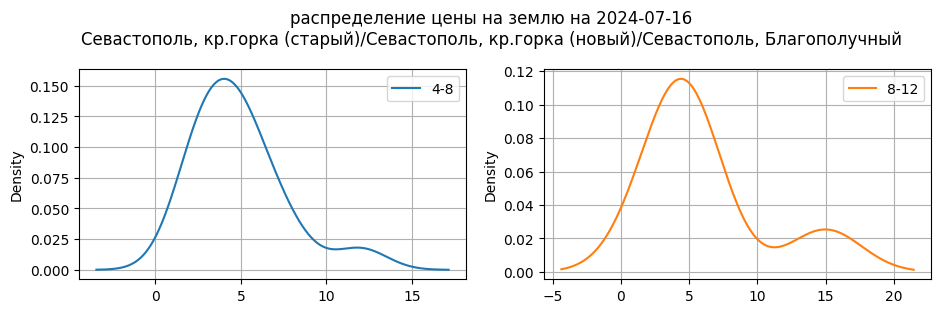

In [51]:
q_95 = gdf_last_local['priceM'].quantile(.95)
sizes_ = ['4-8', '8-12' ]
# fig, ax = plt.subplots() #figsize=(7,3) )
(
    gdf_last_local
    .query(f'(priceM<{q_95})')
    .query('area_size_category in @sizes_')
    #.groupby(['house_size_category'],observed=True)
    .pivot(columns='area_size_category',values='priceM')
    #['priceM']
    #.count()
    .plot.kde(
        legend=True,
        #ax=ax,
        # title='/'.join(area_name), 
        title=f'распределение цены на землю на '+ str( dt_now )+ '\n'+'/'.join(area_name), 
        grid=True,
        subplots=True,
        layout=(2,2),
        figsize=(11,6),
        sharex=False
    )   
)
#fig.suptitle(f'распределение цены на дома на '+ str( dt_now ), fontsize=16)
#fig.tight_layout()

In [52]:
# q_95 = gdf_last_local['priceM'].quantile(.95)
# sizes_ = ['4-8', '8-12' ]

# fig, ax = plt.subplots(figsize=(7,3) )
# (
#     gdf_last_local
#     .query(f'(priceM<{q_95})')
#     .query('area_size_category in @sizes_')
#     .drop_duplicates('url')
#     .groupby(['area_size_category'],observed=True)
#     ['priceM']
#     # .count()
#     .plot.kde(legend=True,ax=ax,title='/'.join(area_name), grid=True)   
# )
# fig.suptitle(f'распределение цены на землю на '+ str(dt_now ), fontsize=16)
# fig.tight_layout()

----

In [53]:
# изменение цены по району
gdf_local = (
    gdf
    .query('area_size_category in @sizes_')
    .drop_duplicates('url')
    .sjoin( frame_, how='inner', predicate='within') 
)

In [57]:
# percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = gdf_local.groupby(['area_size_category','week'],observed=True)['priceM'].describe(percentiles=percentiles)
# stat = gdf_local.groupby(['area_size_category','month'],observed=True)['priceM'].describe(percentiles=percentiles)
stat = stat.dropna() 
display( stat )

count  mean  std  min   1%   5%  \
area_size_category week                                                     
4-8                2024-06-10/2024-06-16  13.00  4.71 2.11 2.45 2.46 2.51   
                   2024-06-17/2024-06-23   6.00  6.68 3.72 2.00 2.12 2.62   
                   2024-06-24/2024-06-30   2.00  4.75 3.18 2.50 2.54 2.73   
                   2024-07-08/2024-07-14   3.00  6.77 4.50 3.50 3.53 3.64   
                   2024-07-15/2024-07-21   8.00  4.30 2.14 1.70 1.74 1.91   
8-12               2024-06-03/2024-06-09   2.00  4.20 0.99 3.50 3.51 3.57   
                   2024-06-10/2024-06-16  11.00  5.25 3.66 2.10 2.24 2.80   
                   2024-06-17/2024-06-23  10.00  6.51 3.78 2.10 2.35 3.36   
                   2024-07-08/2024-07-14   2.00  5.90 3.11 3.70 3.74 3.92   
                   2024-07-15/2024-07-21   4.00 10.10 6.25 4.50 4.51 4.56   

                                          10%  25%  50%   75%   90%   95%  \
area_size_category week                                                     
4-8                2024-06-10/2024-06-16 2.68 3.40 3.99  4.99  7.70  8.60   
                   2024-06-17/2024-06-23 3.25 4.60 5.80  9.18 11.00 11.50   
                   2024-06-24/2024-06-30 2.95 3.62 4.75  5.88  6.55  6.77   
                   2024-07-08/2024-07-14 3.78 4.20 4.90  8.40 10.50 11.20   
                   2024-07-15/2024-07-21 2.12 2.83 4.05  5.33  6.81  7.40   
8-12               2024-06-03/2024-06-09 3.64 3.85 4.20  4.55  4.76  4.83   
                   2024-06-10/2024-06-16 3.50 3.98 4.50  4.93  5.00 10.50   
                   2024-06-17/2024-06-23 4.62 5.00 5.15  5.50 12.96 13.48   
                   2024-07-08/2024-07-14 4.14 4.80 5.90  7.00  7.66  7.88   
                   2024-07-15/2024-07-21 4.62 4.80 9.95 15.25 15.70 15.85   

                                           max  
area_size_category week                         
4-8                2024-06-10/2024-06-16  9.50  
                   2024-06-17/2024-06-23 12.00  
                   2024-06-24/2024-06-30  7.00  
                   2024-07-08/2024-07-14 11.90  
                   2024-07-15/2024-07-21  8.00  
8-12               2024-06-03/2024-06-09  4.90  
                   2024-06-10/2024-06-16 16.00  
                   2024-06-17/2024-06-23 13.99  
                   2024-07-08/2024-07-14  8.10  
                   2024-07-15/2024-07-21 16.00

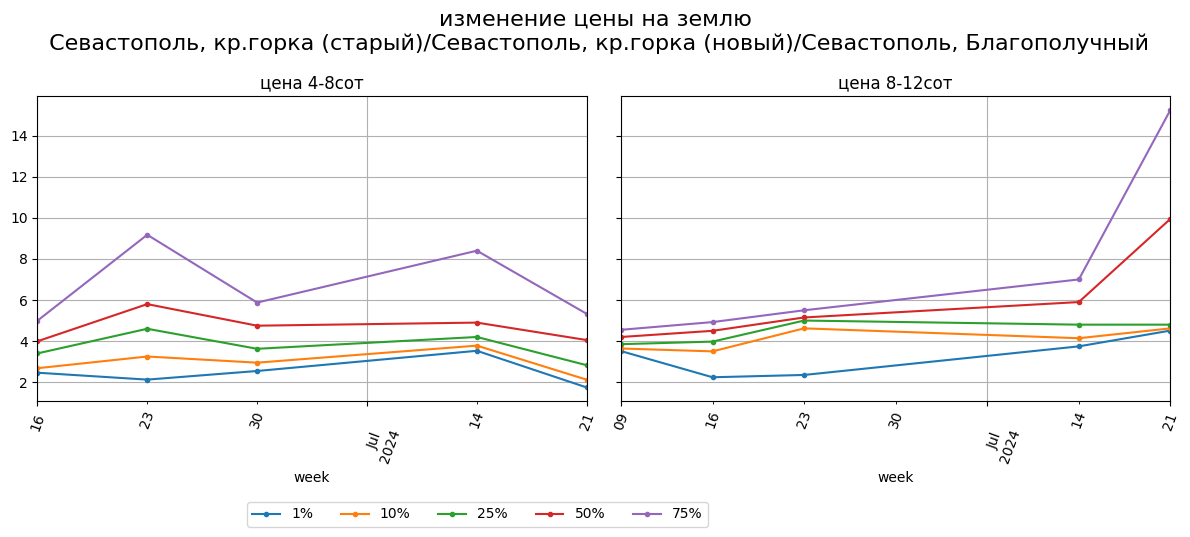

In [59]:
fig, ax = plt.subplots(1,len(sizes_),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes_): 
    stat.loc[(s),cols].plot(title=f'цена {s}сот', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение цены на землю\n {'/'.join(area_name)}', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

-----

In [ ]:
# #           46.319437, 33.911048
# #
# # 45.402617, 32.455625 |  45.545301, 36.684702
# #
# #          44.320887, 33.917013

# display( len(df) )
# df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 
# display( len(df) )

# # df.loc[ df['address'].str.lower().str.match(r'бахчисарай.*надежда.*'), ['latitude','longitude'] ] = None 
# # df.loc[ df['address'].str.lower().str.match(r'бахчисарай.*с.дачное.*'), ['latitude','longitude'] ] = None 

In [ ]:
# # df.loc[ df['url']=='https://avito.ru/2322251740', ['latitude','longitude']] = None
# df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
# df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

In [ ]:
# df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
# df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

# df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
# df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

# df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
# df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
# df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

# df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
# df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
# df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

# df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
# df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

# df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

# df.loc[ df['address'].str.lower().str.match(r'.*ялта.*') , 'place' ] = 'yalta'
# df.loc[ df['address'].str.lower().str.match(r'.*феодосия.*') , 'place' ] = 'feodosia'
# df.loc[ df['address'].str.lower().str.match(r'.*окуневка.*') , 'place' ] = 'tarkhankut'
# df.loc[ df['address'].str.lower().str.match(r'.*заветное.*') , 'place' ] = 'kerch'
# df.loc[ df['address'].str.lower().str.match(r'.*евпатория.*') , 'place' ] = 'evpatoria'